# CMB-S4 All Chile config - Cluster sensitivity

In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import numpy as np, glob, healpy as H, os, sys
from pylab import *
from scipy.ndimage import gaussian_filter, median_filter

import warnings
warnings.filterwarnings("ignore")
import logging
logging.getLogger().setLevel(logging.ERROR)

In [3]:
rcParams['figure.dpi'] = 150
rcParams['figure.facecolor'] = 'white'
rcParams['font.family'] = 'serif'

# Read and plot cluster limiting mass thresholds

In [4]:
survey_dic = {
             'lat_wide': ['wide_supplement', r'LAT-Wide'],
             'lat_roman': ['roman_supplement', r'LAT-Roman'], 
             'lat_delensing': ['delensing_sun90bk', r'LAT-Delensing'], 
             }


fd = 'results/cluster/'

expname_pref = 's4_all_chile_config'
survey_arr = ['lat_wide', 'lat_delensing', 'lat_roman']
patch_arr = [1, 2]#, 3, 4]
#year_arr = np.arange(1, 11)
year_arr = [2, 4, 6, 8, 10]
#print( year_arr )



In [5]:
cluster_lim_mass_dic = {}
for survey in survey_arr:
    cluster_lim_mass_dic[survey] = {}
    for patch in patch_arr:
        curr_survey_plus_patch_name = '%s_%s---patch%s' %(expname_pref, survey, patch)
        curr_fname = '%s/snr_from_lnlikes_%s_baseline-diffbgskies_with_limiting_masses.npy' %(fd, curr_survey_plus_patch_name)
        #print( curr_fname )
        curr_dic = np.load( curr_fname, allow_pickle=True ).item()
        curr_lim_mass_dic = curr_dic['limiting_mass_dic']['dust_ksz_rg_tsz'][6]
        zarr, lim_mass_arr, lim_mass_err_arr  = [], [], []
        for zval in curr_lim_mass_dic:
            zarr.append( zval )
            lim_mass_arr.append( curr_lim_mass_dic[zval][0] )
            lim_mass_err_arr.append( curr_lim_mass_dic[zval][1] )
            
        if (1): #make the errors nicer just in case
            '''
            lim_mass_err_arr = np.asarray(lim_mass_err_arr)
            lim_mass_err_arr_mod = median_filter(lim_mass_err_arr, 5)
            
            clf()
            plot(zarr, lim_mass_arr)
            fill_between( zarr, lim_mass_arr-lim_mass_err_arr, lim_mass_arr+lim_mass_err_arr, alpha = 0.2)
            fill_between( zarr, lim_mass_arr-lim_mass_err_arr_mod, lim_mass_arr+lim_mass_err_arr_mod, alpha = 0.2, color = 'red')
            show(); sys.exit()
            '''
            lim_mass_err_arr = np.asarray(lim_mass_err_arr)
            lim_mass_err_arr = median_filter(lim_mass_err_arr, 5)
            
            
        cluster_lim_mass_dic[survey][patch] = [np.asarray(zarr), np.asarray(lim_mass_arr), np.asarray(lim_mass_err_arr)]
        
print(cluster_lim_mass_dic.keys())


dict_keys(['lat_wide', 'lat_delensing', 'lat_roman'])


In [6]:
#also store the old S4 PBDR config
cluster_lim_mass_dic_pbdr = {}
curr_fname = '%s/snr_from_lnlikes_S4sixbands_baseline-diffbgskies_500sims_with_limiting_masses.npy' %(fd)
curr_dic = np.load( curr_fname, allow_pickle=True ).item()
curr_lim_mass_dic = curr_dic['limiting_mass_dic']['dust_ksz_rg_tsz'][6]
zarr, lim_mass_arr, lim_mass_err_arr = [], [], []
for zval in curr_lim_mass_dic:
    zarr.append( zval )
    lim_mass_arr.append( curr_lim_mass_dic[zval][0] )
    lim_mass_err_arr.append( curr_lim_mass_dic[zval][1] )

cluster_lim_mass_dic_pbdr['S4-Wide'] = [np.asarray(zarr), np.asarray(lim_mass_arr), np.asarray(lim_mass_err_arr)]

"""
#S4-Ultra deep
cluster_lim_mass_dic_pbdr_ultradeep = {}
curr_fname = '%s/snr_from_lnlikes_S4sixbands_baseline-diffbgskies_500sims_with_limiting_masses.npy' %(fd)
curr_dic = np.load( curr_fname, allow_pickle=True ).item()
curr_lim_mass_dic = curr_dic['limiting_mass_dic']['dust_ksz_rg_tsz'][6]
zarr, lim_mass_arr, lim_mass_err_arr = [], [], []
for zval in curr_lim_mass_dic:
    zarr.append( zval )
    lim_mass_arr.append( curr_lim_mass_dic[zval][0] )
    lim_mass_err_arr.append( curr_lim_mass_dic[zval][1] )

cluster_lim_mass_dic_pbdr_ultradeep['S4-Ultra deep'] = [np.asarray(zarr), np.asarray(lim_mass_arr), np.asarray(lim_mass_err_arr)]
"""

#ASO and SPT-3G+
cluster_lim_mass_dic_others = {}
tmp_fname_dic = {'ASO-Baseline':'%s/snr_from_lnlikes_s4_all_chile_config_latadvanced_so_baseline_only_baseline-diffbgskies_with_limiting_masses.npy' %(fd), 
                 'ASO-Goal':'%s/snr_from_lnlikes_s4_all_chile_config_latadvanced_so_goal_only_baseline-diffbgskies_with_limiting_masses.npy' %(fd), 
                 'SPT-3G+':'%s/snr_from_lnlikes_s4_all_chile_config_latspt3g_plus_only_baseline-diffbgskies_with_limiting_masses.npy' %(fd), 
                 'LAT_wide+ASO-Goal-Patch-1-Year2':'%s/snr_from_lnlikes_s4_all_chile_config_lat_wide---patch1---year2+advanced_so_goal_baseline-diffbgskies_with_limiting_masses.npy' %(fd), 
                 'LAT_wide+ASO-Goal-Patch-2-Year2':'%s/snr_from_lnlikes_s4_all_chile_config_lat_wide---patch2---year2+advanced_so_goal_baseline-diffbgskies_with_limiting_masses.npy' %(fd), 
                 'LAT_wide+ASO-Goal-Patch-1-Year10':'%s/snr_from_lnlikes_s4_all_chile_config_lat_wide---patch1+advanced_so_goal_baseline-diffbgskies_with_limiting_masses.npy' %(fd), 
                 'LAT_wide+ASO-Goal-Patch-2-Year10':'%s/snr_from_lnlikes_s4_all_chile_config_lat_wide---patch2+advanced_so_goal_baseline-diffbgskies_with_limiting_masses.npy' %(fd), 
                }
for tmp_exp in tmp_fname_dic:
    curr_dic = np.load( tmp_fname_dic[tmp_exp], allow_pickle=True ).item()
    curr_lim_mass_dic = curr_dic['limiting_mass_dic']['dust_ksz_rg_tsz'][6]
    zarr, lim_mass_arr, lim_mass_err_arr = [], [], []
    for zval in curr_lim_mass_dic:
        zarr.append( zval )
        lim_mass_arr.append( curr_lim_mass_dic[zval][0] )
        lim_mass_err_arr.append( curr_lim_mass_dic[zval][1] )

    cluster_lim_mass_dic_others[tmp_exp] = [np.asarray(zarr), np.asarray(lim_mass_arr), np.asarray(lim_mass_err_arr)]


In [7]:
reqd_z = 1.5
for survey in cluster_lim_mass_dic:
    for patch in patch_arr:
        zarr, lim_mass_arr, lim_mass_err_arr = cluster_lim_mass_dic[survey][patch]
        reqd_z_ind = np.where( zarr == reqd_z )[0][0]     
        print( 'Survey = %s; Patch = %s; Limiting mass = %.3f +/- %.3f at z = %s' %(survey, patch, lim_mass_arr[reqd_z_ind], lim_mass_err_arr[reqd_z_ind], reqd_z))
        

Survey = lat_wide; Patch = 1; Limiting mass = 1.072 +/- 0.077 at z = 1.5
Survey = lat_wide; Patch = 2; Limiting mass = 1.148 +/- 0.098 at z = 1.5
Survey = lat_delensing; Patch = 1; Limiting mass = 0.813 +/- 0.058 at z = 1.5
Survey = lat_delensing; Patch = 2; Limiting mass = 1.047 +/- 0.073 at z = 1.5
Survey = lat_roman; Patch = 1; Limiting mass = 0.851 +/- 0.057 at z = 1.5
Survey = lat_roman; Patch = 2; Limiting mass = 1.023 +/- 0.071 at z = 1.5


# Patches 1 and 2 on a single plot for all the surveys

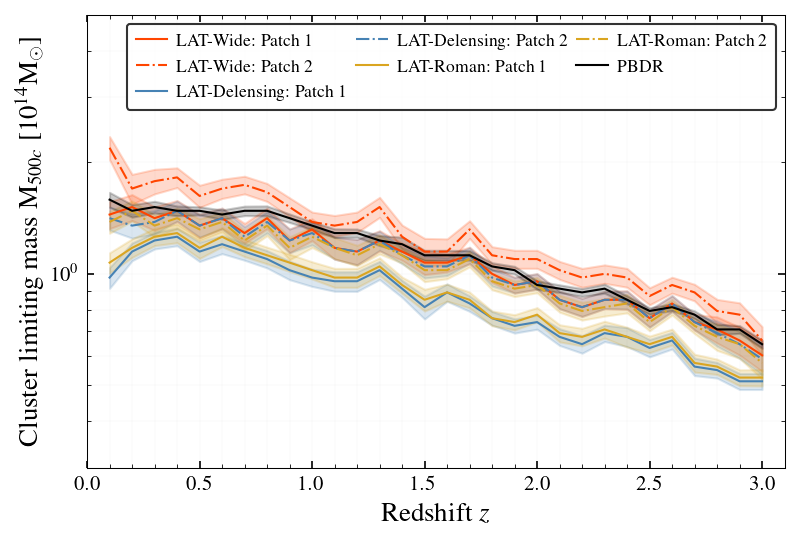

In [8]:
clf()
fsval = 13
alphaval_for_errros = 0.2
xmin, xmax = 0., 3.1
ymin, ymax = 0.3, 5.
ax = subplot(111, yscale = 'log')
color_dic = {'lat_wide': 'orangered', 'lat_delensing': 'steelblue', 'lat_roman': 'goldenrod'}
ls_dic = {1: '-', 2: '-.'}
for cntr, survey in enumerate( survey_arr ):
    surveyval, surveylabval = survey_dic[survey]    
    for patch in [1, 2]:
        zarr, lim_mass_arr, lim_mass_err_arr = cluster_lim_mass_dic[survey][patch]
        plot(zarr, lim_mass_arr, color = color_dic[survey], ls = ls_dic[patch], label = r'%s: Patch %s' %(surveylabval, patch))
        fill_between( zarr, lim_mass_arr-lim_mass_err_arr, lim_mass_arr+lim_mass_err_arr, color = color_dic[survey], alpha = alphaval_for_errros)


#now add PBDR
zarr, lim_mass_arr, lim_mass_err_arr = cluster_lim_mass_dic_pbdr['S4-Wide']
plot(zarr, lim_mass_arr, color = 'black', ls = '-', label = r'PBDR')
fill_between( zarr, lim_mass_arr-lim_mass_err_arr, lim_mass_arr+lim_mass_err_arr, color = 'black', alpha = alphaval_for_errros)
#xloc, yloc = 2, 1.
#text( xloc, yloc, r'{\bf S4-PBDR}', fontsize = fsval-2, rotation = -10)
        
ylim( ymin, ymax )
xlim( xmin, xmax )
legend(loc = 1, fontsize = fsval-4.5, ncol = 3, columnspacing = 0.5, handletextpad = 0.5, handlelength = 1.8)
ylabel(r'Cluster limiting mass M$_{500c}$ [$10^{14}$M$_{\odot}$]', fontsize = fsval)
xlabel(r'Redshift $z$', fontsize = fsval )
#title(r'CMB-S4 all-Chile configurations', fontsize = fsval + 2)
grid(True, which = 'both', axis = 'both', lw = 0.2, alpha = 0.05)
        
#plname = 'plots/cluster_lim_mass_vs_z_patches_1_and_2_single_panel.png'
plname = 'plots/cluster_lim_mass_vs_z_patches_1_and_2_single_panel.pdf'
savefig(plname, dpi = 200.)
show(); ##sys.exit()
    

# Patches 1 and 2 on a three panel plot for all the surveys

<Figure size 900x600 with 0 Axes>

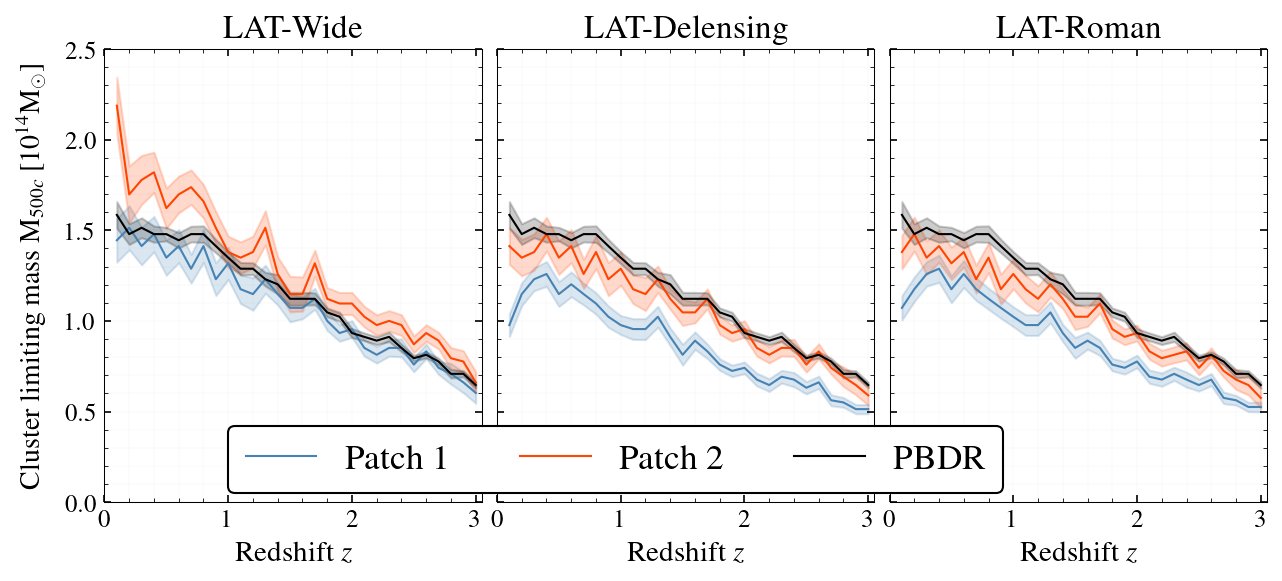

In [9]:
yscaleval = None #'log'
clf()
fsval = 14
xmin, xmax = 0., 3.05
if yscaleval == 'log':
    ymin, ymax = 0.3, 3.
elif yscaleval is None:
    ymin, ymax = 0., 2.5
tr, tc = 1, len( cluster_lim_mass_dic )
figure(figsize = (10., 4.))
subplots_adjust(wspace = 0.04)
sbpl = 1
for cntr, survey in enumerate( survey_arr ):
    surveyval, surveylabval = survey_dic[survey]
    ax = subplot( tr, tc, sbpl, yscale = yscaleval)
    color_arr = ['steelblue', 'orangered']
    for patch in [1, 2]:
        zarr, lim_mass_arr, lim_mass_err_arr = cluster_lim_mass_dic[survey][patch]
        plot(zarr, lim_mass_arr, color = color_arr[patch-1], label = r'Patch %s' %(patch))
        fill_between( zarr, lim_mass_arr-lim_mass_err_arr, lim_mass_arr+lim_mass_err_arr, color = color_arr[patch-1], alpha = alphaval_for_errros)

    #now add PBDR
    zarr, lim_mass_arr, lim_mass_err_arr = cluster_lim_mass_dic_pbdr['S4-Wide']
    plot(zarr, lim_mass_arr, color = 'black', ls = '-', label = r'PBDR')
    fill_between( zarr, lim_mass_arr-lim_mass_err_arr, lim_mass_arr+lim_mass_err_arr, color = 'black', alpha = alphaval_for_errros)
    #xloc, yloc = 2, 1.
    #text( xloc, yloc, r'{\bf S4-PBDR}', fontsize = fsval-2, rotation = -10)
    
    '''
    ax.yaxis.set_major_locator(MaxNLocator(nbins=3))
    ax.yaxis.set_minor_locator(MaxNLocator(nbins=6))
    #ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
    ax.yaxis.set_minor_formatter(FormatStrFormatter("%1.e"))
    '''
    ax.yaxis.set_major_locator(MaxNLocator(nbins=5))
    #ax.xaxis.set_major_locator(MaxNLocator(nbins=5))
        
    ylim( ymin, ymax )
    xlim( xmin, xmax )
    sbpl += 1
    if cntr == 2:
        legend(bbox_to_anchor = (-1.8, -0.02), loc = 3, fontsize = fsval+3, ncol = 3, framealpha = 1.)
    if cntr == 0:
        ylabel(r'Cluster limiting mass M$_{500c}$ [$10^{14}$M$_{\odot}$]', fontsize = fsval-0.5, labelpad = 10)
    else:
        setp(ax.get_yticklabels(which = 'both'), visible=False)
    xlabel(r'Redshift $z$', fontsize = fsval )
    title(r'%s' %(surveylabval), fontsize = fsval + 2)
    grid(True, which = 'both', axis = 'both', lw = 0.2, alpha = 0.05)
    
    for label in ax.get_xticklabels(): label.set_fontsize(fsval-2)
    for label in ax.get_yticklabels(): label.set_fontsize(fsval-2)
        
plname = 'plots/cluster_lim_mass_vs_z_all_surveys_patches_1_and_2.pdf'
savefig(plname, dpi = 200.)
show(); #sys.exit()
        
        
    

# All the patches on a three plot for all the surveys

<Figure size 900x600 with 0 Axes>

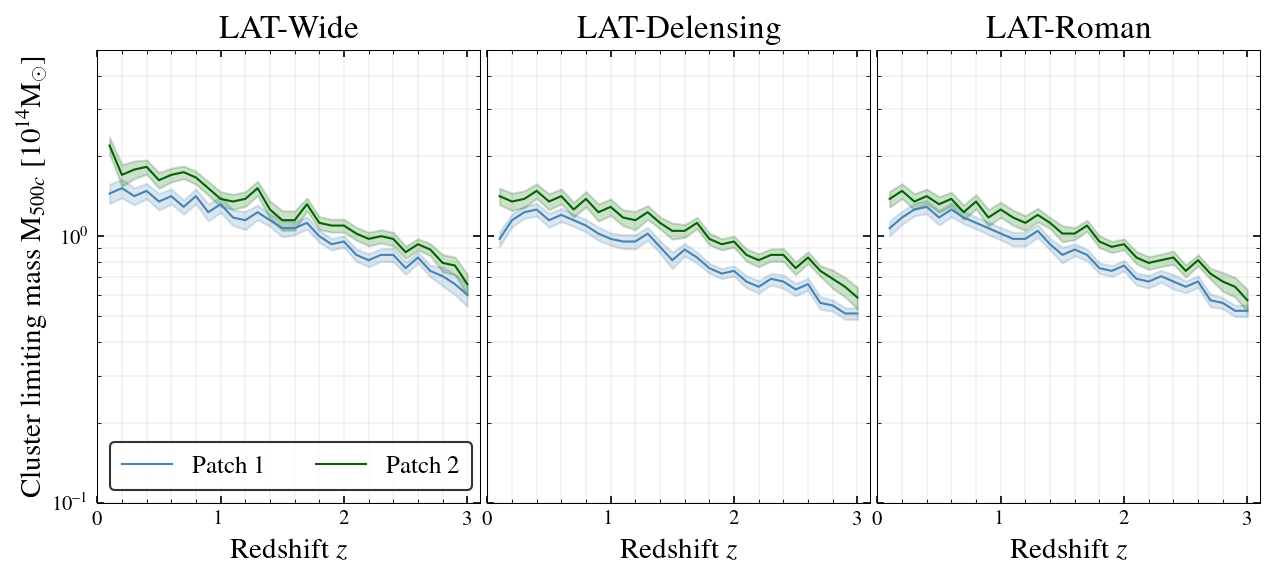

In [10]:
clf()
fsval = 14
xmin, xmax = 0., 3.1
ymin, ymax = 0.1, 5.
tr, tc = 1, len( cluster_lim_mass_dic )
figure(figsize = (10., 4.))
subplots_adjust(wspace = 0.02)
sbpl = 1
for cntr, survey in enumerate( survey_arr ):
    surveyval, surveylabval = survey_dic[survey]
    ax = subplot( tr, tc, sbpl, yscale = 'log')
    color_arr = ['steelblue', 'darkgreen', 'goldenrod', 'orangered']
    for patch in patch_arr:
        zarr, lim_mass_arr, lim_mass_err_arr = cluster_lim_mass_dic[survey][patch]
        plot(zarr, lim_mass_arr, color = color_arr[patch-1], label = r'Patch %s' %(patch))
        fill_between( zarr, lim_mass_arr-lim_mass_err_arr, lim_mass_arr+lim_mass_err_arr, color = color_arr[patch-1], alpha = alphaval_for_errros)
    ylim( ymin, ymax )
    xlim( xmin, xmax )
    sbpl += 1
    if cntr == 0:
        legend(loc = 3, fontsize = fsval-2, ncol = 2)
        ylabel(r'Cluster limiting mass M$_{500c}$ [$10^{14}$M$_{\odot}$]', fontsize = fsval)
    else:
        setp(ax.get_yticklabels(), visible=False)
    xlabel(r'Redshift $z$', fontsize = fsval )
    title(r'%s' %(surveylabval), fontsize = fsval + 2)
    grid(True, which = 'both', axis = 'both', lw = 0.2, alpha = 0.2)
        
plname = 'plots/cluster_lim_mass_vs_z_all_patches.png'
savefig(plname, dpi = 200.)

show(); #sys.exit()
        
        
    

# Multiple year plots now.

In [11]:
cluster_lim_mass_dic = {}
for survey in survey_arr:
    cluster_lim_mass_dic[survey] = {}
    for patch in patch_arr[:2]:
        cluster_lim_mass_dic[survey][patch] = {}
        for year in year_arr:
            if year == 10:
                curr_survey_plus_patch_name = '%s_%s---patch%s' %(expname_pref, survey, patch)
            else:
                curr_survey_plus_patch_name = '%s_%s---patch%s---year%s' %(expname_pref, survey, patch, year)
            curr_fname = '%s/snr_from_lnlikes_%s_baseline-diffbgskies_with_limiting_masses.npy' %(fd, curr_survey_plus_patch_name)
            #print( curr_fname )
            curr_dic = np.load( curr_fname, allow_pickle=True ).item()
            ##print(curr_dic['limiting_mass_dic']['dust_ksz_rg_tsz'].keys()); sys.exit()
            try:
                curr_lim_mass_dic = curr_dic['limiting_mass_dic']['dust_ksz_rg_tsz'][6]
            except:
                print(curr_survey_plus_patch_name)
            zarr, lim_mass_arr, lim_mass_err_arr  = [], [], []
            for zval in curr_lim_mass_dic:
                zarr.append( zval )
                lim_mass_arr.append( curr_lim_mass_dic[zval][0] )
                lim_mass_err_arr.append( curr_lim_mass_dic[zval][1] )

            if (1): #make the errors nicer just in case
                '''
                lim_mass_err_arr = np.asarray(lim_mass_err_arr)
                lim_mass_err_arr_mod = median_filter(lim_mass_err_arr, 5)

                clf()
                plot(zarr, lim_mass_arr)
                fill_between( zarr, lim_mass_arr-lim_mass_err_arr, lim_mass_arr+lim_mass_err_arr, alpha = 0.2)
                fill_between( zarr, lim_mass_arr-lim_mass_err_arr_mod, lim_mass_arr+lim_mass_err_arr_mod, alpha = 0.2, color = 'red')
                show(); sys.exit()
                '''
                lim_mass_err_arr = np.asarray(lim_mass_err_arr)
                lim_mass_err_arr = median_filter(lim_mass_err_arr, 5)

            
            cluster_lim_mass_dic[survey][patch][year] = [np.asarray(zarr), np.asarray(lim_mass_arr), np.asarray(lim_mass_err_arr)]
        
print(cluster_lim_mass_dic.keys())


dict_keys(['lat_wide', 'lat_delensing', 'lat_roman'])


2
3
4
5
6
7


<Figure size 900x600 with 0 Axes>

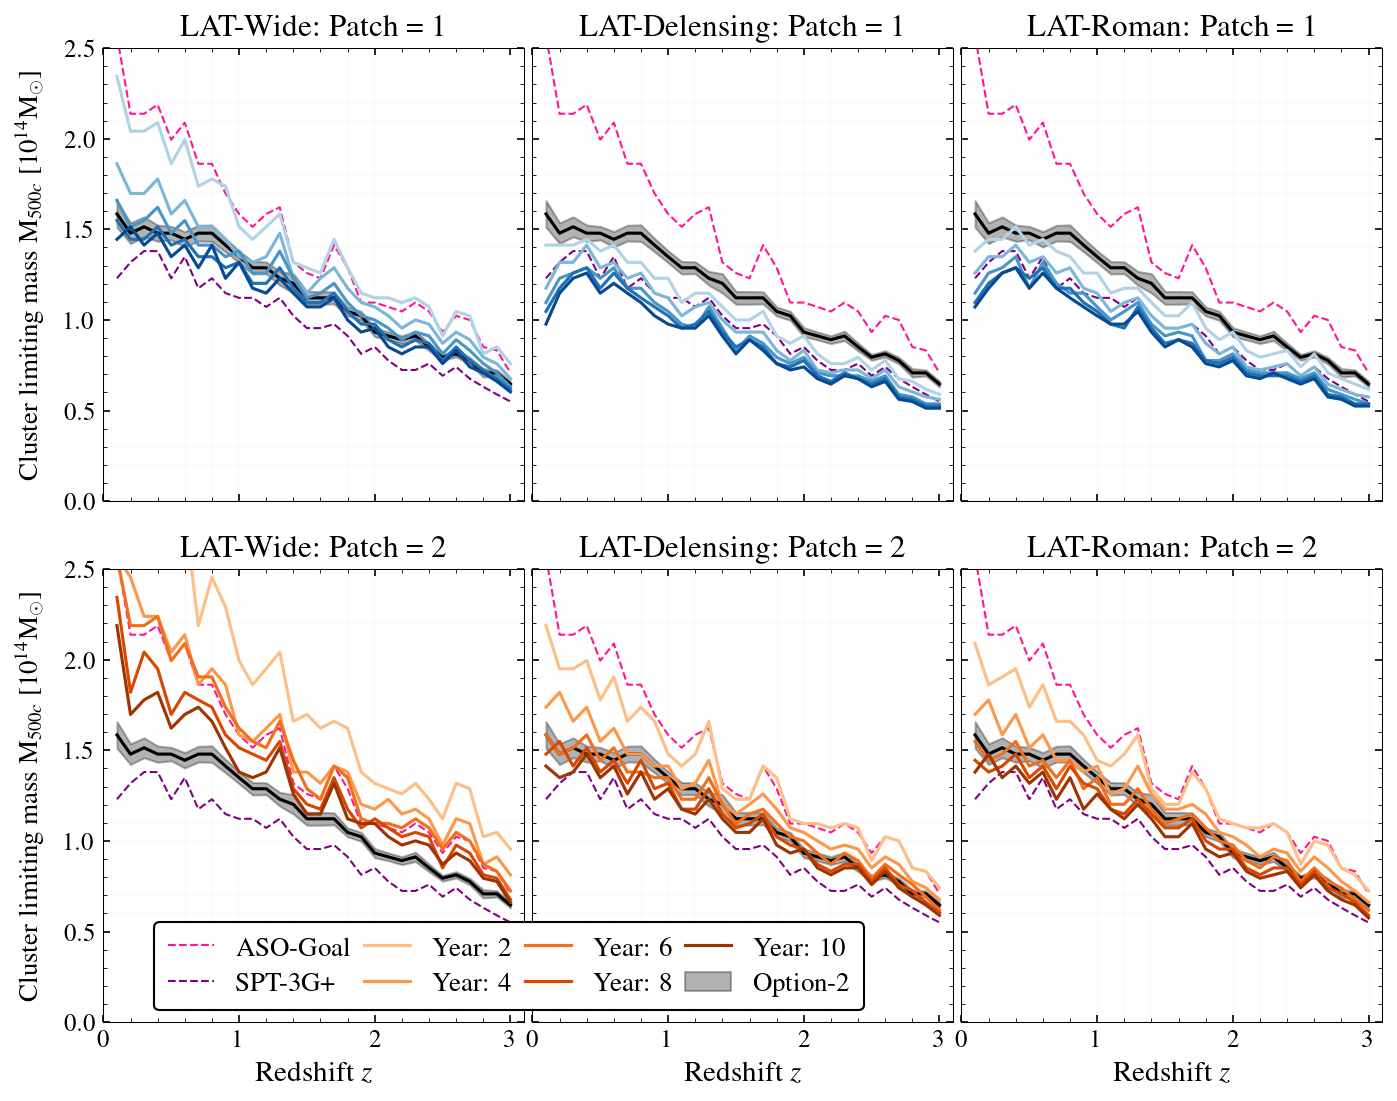

SystemExit: 

In [12]:
clf()
yscaleval = None
if yscaleval == 'log':
    ymin, ymax = 0.3, 3.
elif yscaleval is None:
    ymin, ymax = 0., 2.5

fsval = 14
xmin, xmax = 0., 3.1
tr, tc = 2, len( cluster_lim_mass_dic )
figure(figsize = (11., 8.6))
alphaval_for_errros = 0.3
pbdr_color = 'black'#tab:green'
subplots_adjust(wspace = 0.02, hspace = 0.15)
sbpl = 1
for patch in [1, 2]:
    for cntr, survey in enumerate( survey_arr ):
        ax = subplot(tr, tc, sbpl, yscale = yscaleval)

        #now add PBDR
        zarr, lim_mass_arr, lim_mass_err_arr = cluster_lim_mass_dic_pbdr['S4-Wide']
        plot(zarr, lim_mass_arr, color = pbdr_color, ls = '-', lw = 1.5)
        fill_between( zarr, lim_mass_arr-lim_mass_err_arr, lim_mass_arr+lim_mass_err_arr, label = r'Option-2', color = pbdr_color, alpha = alphaval_for_errros)
        #xloc, yloc = 2, 1.
        #text( xloc, yloc, r'{\bf S4-PBDR}', fontsize = fsval-2, rotation = -10)
        
        #ASO-Baseline
        zarr, lim_mass_arr, lim_mass_err_arr = cluster_lim_mass_dic_others['ASO-Baseline']
        ##plot(zarr, lim_mass_arr, color = 'royalblue', ls = '--', lw = 1., label = r'ASO-Baseline')

        #ASO-Goal
        zarr, lim_mass_arr, lim_mass_err_arr = cluster_lim_mass_dic_others['ASO-Goal']
        plot(zarr, lim_mass_arr, color = 'deeppink', ls = '--', lw = 1., label = r'ASO-Goal')
        
        #SPT-3G+
        zarr, lim_mass_arr, lim_mass_err_arr = cluster_lim_mass_dic_others['SPT-3G+']
        plot(zarr, lim_mass_arr, color = 'purple', ls = '--', lw = 1., label = r'SPT-3G+')

        color_arr_patch1 = [cm.Blues(int(d)) for d in np.linspace(80, 230, len(year_arr))]
        color_arr_patch2 = [cm.Oranges(int(d)) for d in np.linspace(80, 230, len(year_arr))]
        '''
        #color_arr_patch1 = ['navy', 'darkgreen', 'goldenrod', 'orangered', 'darkred']
        color_arr_patch1 = [cm.Greys(int(d)) for d in np.linspace(50, 255, len(year_arr))]
        color_arr_patch2 = color_arr_patch1
        '''
        ls_dic = {1: '-', 2: '-'}
        color_dic = {1: color_arr_patch1, 2: color_arr_patch2}
        surveyval, surveylabval = survey_dic[survey]    
        for ycntr, year in enumerate( year_arr ):
            colorval = color_dic[patch][ycntr]
            zarr, lim_mass_arr, lim_mass_err_arr = cluster_lim_mass_dic[survey][patch][year]
            if patch == 2 and cntr == 2:
                labval = r'Year: %s' %(year)
                write_leg = True
            else:
                labval = None
                write_leg = False
            if year == 10:
                plot(zarr, lim_mass_arr, color = colorval, ls = ls_dic[patch], label = labval, lw = 1.5)#, label = r'%s: Patch %s' %(surveylabval, patch))
                #fill_between( zarr, lim_mass_arr-lim_mass_err_arr, lim_mass_arr+lim_mass_err_arr, color = colorval, alpha = alphaval_for_errros)
            else:
                plot(zarr, lim_mass_arr, color = colorval, ls = ls_dic[patch], label = labval, lw = 1.5)#, label = r'%s: Patch %s' %(surveylabval, patch))

        ylim( ymin, ymax )
        xlim( xmin, xmax )
        
        if write_leg:
            #legend(bbox_to_anchor = (-1.8, -0.02), loc = 3, fontsize = fsval+3, ncol = 3, framealpha = 1.)
            legend(bbox_to_anchor = (-0.2, 0.25), loc = 1, fontsize = fsval-1, ncol = 4, framealpha = 1., labelspacing = 0.4, columnspacing = 0.5, handlelength = 1.7)
        
        #legend(loc = 1, fontsize = fsval-4, ncol = 3, columnspacing = 0.5, handletextpad = 0.5, handlelength = 1.8)
        if (sbpl-1)%tc == 0:
            ylabel(r'Cluster limiting mass M$_{500c}$ [$10^{14}$M$_{\odot}$]', fontsize = fsval-1, labelpad = 10)
        else:
            setp(ax.get_yticklabels(), visible=False)
        if sbpl>tc: 
            xlabel(r'Redshift $z$', fontsize = fsval )
        else:
            setp(ax.get_xticklabels(), visible=False)
        #title(r'%s: Patch = %s' %(surveylabval, patch), fontsize = fsval + 2)

        title(r'%s: Patch = %s' %(surveylabval, patch), fontsize = fsval + 1)
        grid(True, which = 'both', axis = 'both', lw = 0.2, alpha = 0.05)

        for label in ax.get_xticklabels(): label.set_fontsize(fsval-2)
        for label in ax.get_yticklabels(): label.set_fontsize(fsval-2)
        
        sbpl += 1
        print(sbpl)
plname = 'plots/cluster_lim_mass_vs_z_all_surveys_patches_1_and_2_multiple_years.pdf'
savefig(plname, dpi = 200.)
show(); 
sys.exit()

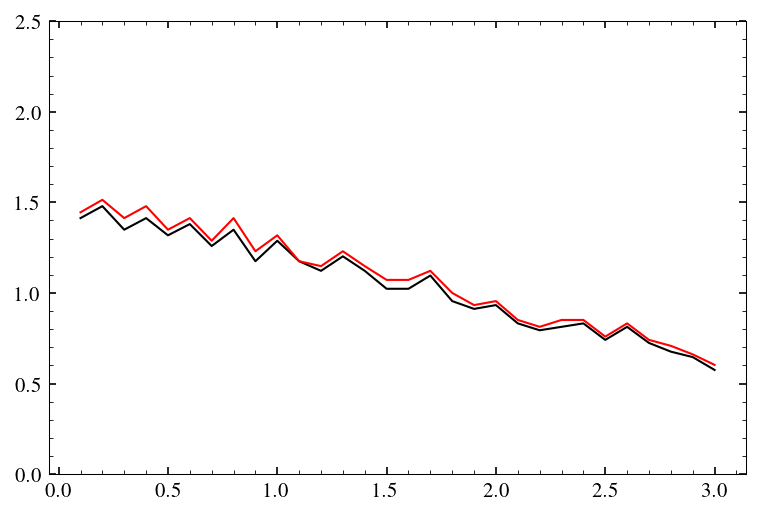

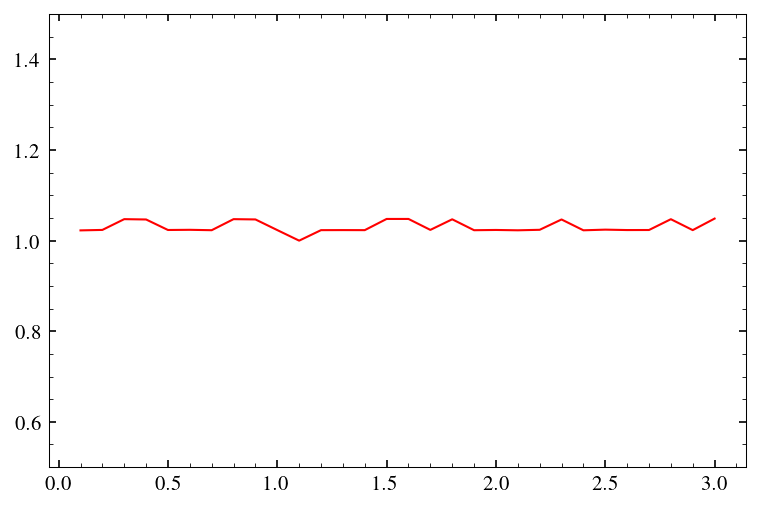

In [13]:
# S4 vs S4+ASO
which_year = 10 #2
which_patch = 1 #2 #1 #1
tmpkey1 = 'LAT_wide+ASO-Goal-Patch-%s-Year%s' %(which_patch, which_year)
zarr_1, lim_mass_arr_1, lim_mass_err_arr_1 = cluster_lim_mass_dic_others[tmpkey1]
zarr_2, lim_mass_arr_2, lim_mass_err_arr_2 = cluster_lim_mass_dic['lat_wide'][which_patch][which_year]

ax = subplot(111)
ymin, ymax = 0., 2.5
plot( zarr_1, lim_mass_arr_1 )
plot( zarr_2, lim_mass_arr_2, color = 'red' )
ylim( ymin, ymax )
show()

ax = subplot(111)
ymin, ymax = 0.5, 1.5
plot( zarr_2, lim_mass_arr_2/lim_mass_arr_1, color = 'red' )
ylim( ymin, ymax )
show()


In [14]:
cluster_lim_mass_dic_others.keys()

dict_keys(['ASO-Baseline', 'ASO-Goal', 'SPT-3G+', 'LAT_wide+ASO-Goal-Patch-1-Year2', 'LAT_wide+ASO-Goal-Patch-2-Year2', 'LAT_wide+ASO-Goal-Patch-1-Year10', 'LAT_wide+ASO-Goal-Patch-2-Year10'])

[2.0, 4.0, 6.0, 8.0, 10.0]
[2.0, 4.0, 6.0, 8.0, 10.0]


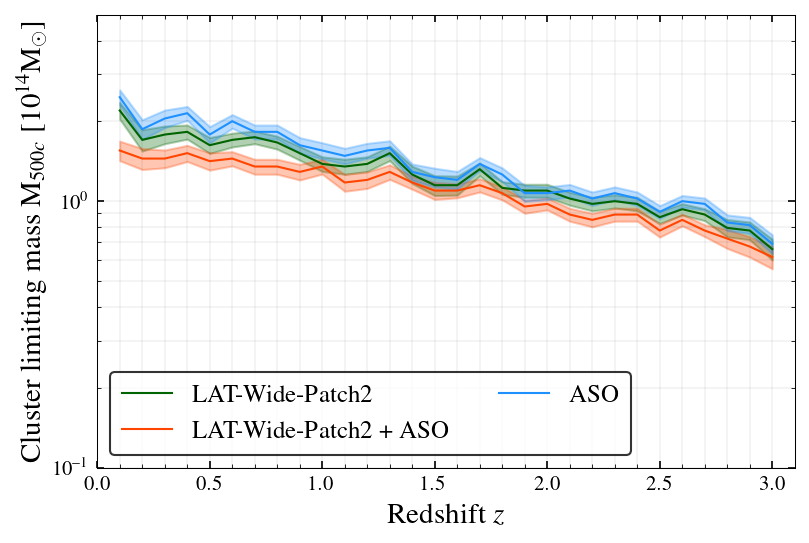

<Figure size 900x600 with 0 Axes>

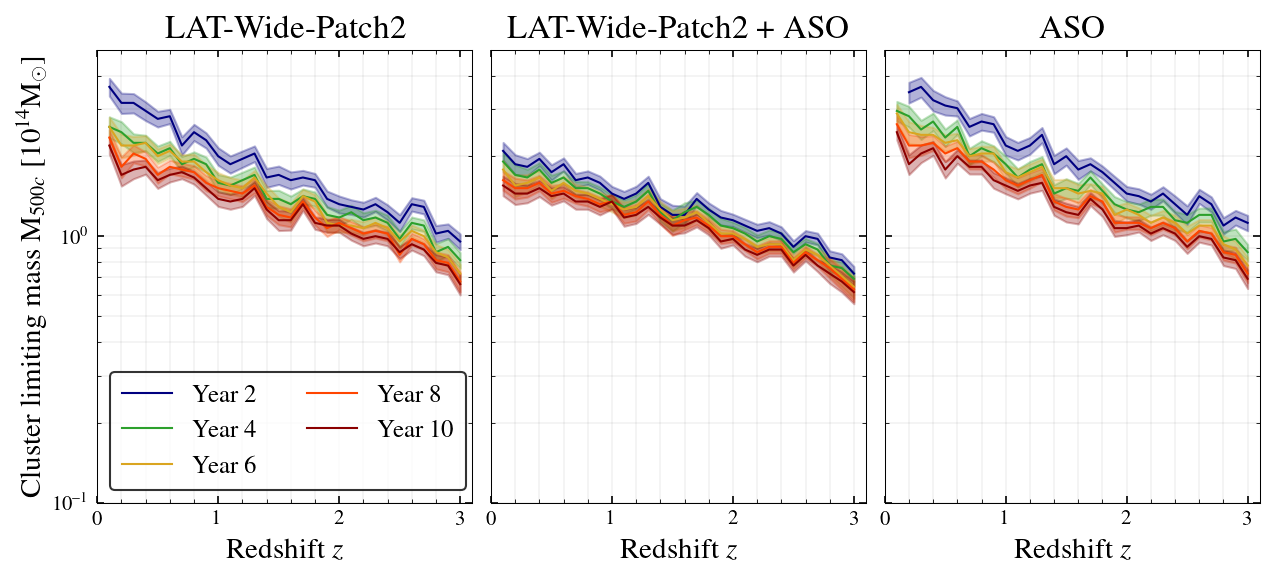

In [15]:
s4_survey_name = 'lat_wide'
aso_survey_name = 'aso_goal'
s4_patch_no = 2

cluster_lim_mass_dic_for_s4_plus_aso = {}
cluster_lim_mass_dic_for_s4_plus_aso[s4_survey_name] = {}
cluster_lim_mass_dic_for_s4_plus_aso[s4_survey_name][s4_patch_no] = {}
searchstr = 'results/cluster/*s4_all_chile_config_lat_wide---patch2---*+advanced_so_goal---*'
flist = sorted( glob.glob( searchstr ) )

for curr_fname in flist:
    #print(curr_fname); sys.exit()
    tmp = curr_fname.split('/')[-1]
    tmpsplit = tmp.split('+')
    s4_survey_year = float( tmpsplit[0].replace('snr_from_lnlikes_s4_all_chile_config_lat_wide---patch2---year', '') )
    
    aso_survey_year = float( tmpsplit[1].replace('advanced_so_goal---year', '').replace('_baseline-diffbgskies_with_limiting_masses.npy', '') )

    #print( curr_fname )
    curr_dic = np.load( curr_fname, allow_pickle=True ).item()
    curr_lim_mass_dic = curr_dic['limiting_mass_dic']['dust_ksz_rg_tsz'][6]
    zarr, lim_mass_arr, lim_mass_err_arr  = [], [], []
    for zval in curr_lim_mass_dic:
        zarr.append( zval )
        lim_mass_arr.append( curr_lim_mass_dic[zval][0] )
        lim_mass_err_arr.append( curr_lim_mass_dic[zval][1] )
            
    if (1): #make the errors nicer just in case
        '''
        lim_mass_err_arr = np.asarray(lim_mass_err_arr)
        lim_mass_err_arr_mod = median_filter(lim_mass_err_arr, 5)
        
        clf()
        plot(zarr, lim_mass_arr)
        fill_between( zarr, lim_mass_arr-lim_mass_err_arr, lim_mass_arr+lim_mass_err_arr, alpha = 0.2)
        fill_between( zarr, lim_mass_arr-lim_mass_err_arr_mod, lim_mass_arr+lim_mass_err_arr_mod, alpha = 0.2, color = 'red')
        show(); sys.exit()
        '''
        lim_mass_err_arr = np.asarray(lim_mass_err_arr)
        lim_mass_err_arr = median_filter(lim_mass_err_arr, 5)
        
        
        cluster_lim_mass_dic_for_s4_plus_aso[s4_survey_name][s4_patch_no][s4_survey_year] = [np.asarray(zarr), np.asarray(lim_mass_arr), np.asarray(lim_mass_err_arr)]
        
print(sorted(cluster_lim_mass_dic_for_s4_plus_aso[s4_survey_name][s4_patch_no].keys()))

cluster_lim_mass_dic_for_aso = {}
searchstr = 'results/cluster/*s4_all_chile_config_latadvanced_so_goal_only---year*'
flist = sorted( glob.glob( searchstr ) )

for curr_fname in flist:
    #print(curr_fname); sys.exit()
    tmp = curr_fname.split('/')[-1]
    ##print(tmp)
    aso_survey_year = float( tmp.replace('snr_from_lnlikes_s4_all_chile_config_latadvanced_so_goal_only---year', '').replace('_baseline-diffbgskies_with_limiting_masses.npy', '') )

    #print( curr_fname )
    curr_dic = np.load( curr_fname, allow_pickle=True ).item()
    curr_lim_mass_dic = curr_dic['limiting_mass_dic']['dust_ksz_rg_tsz'][6]
    zarr, lim_mass_arr, lim_mass_err_arr  = [], [], []
    for zval in curr_lim_mass_dic:
        zarr.append( zval )
        lim_mass_arr.append( curr_lim_mass_dic[zval][0] )
        lim_mass_err_arr.append( curr_lim_mass_dic[zval][1] )
            
    if (1): #make the errors nicer just in case
        '''
        lim_mass_err_arr = np.asarray(lim_mass_err_arr)
        lim_mass_err_arr_mod = median_filter(lim_mass_err_arr, 5)
        
        clf()
        plot(zarr, lim_mass_arr)
        fill_between( zarr, lim_mass_arr-lim_mass_err_arr, lim_mass_arr+lim_mass_err_arr, alpha = 0.2)
        fill_between( zarr, lim_mass_arr-lim_mass_err_arr_mod, lim_mass_arr+lim_mass_err_arr_mod, alpha = 0.2, color = 'red')
        show(); sys.exit()
        '''
        lim_mass_err_arr = np.asarray(lim_mass_err_arr)
        lim_mass_err_arr = median_filter(lim_mass_err_arr, 5)
        
        
        cluster_lim_mass_dic_for_aso[aso_survey_year] = [np.asarray(zarr), np.asarray(lim_mass_arr), np.asarray(lim_mass_err_arr)]
        
print(sorted(cluster_lim_mass_dic_for_aso.keys()))

clf()
fsval = 14
xmin, xmax = 0., 3.1
ymin, ymax = 0.1, 5.

reqd_year = 10
color_arr = ['darkgreen', 'orangered', 'dodgerblue']
ax = subplot(111, yscale = 'log')
for cntr in range(3):
    if cntr == 0:
        reqd_survey = 'lat_wide'
        reqd_patch = 2
        reqd_dic = cluster_lim_mass_dic[reqd_survey][reqd_patch]
        tit_val = r'LAT-Wide-Patch2'
    elif cntr == 1:
        reqd_dic = cluster_lim_mass_dic_for_s4_plus_aso[reqd_survey][reqd_patch]
        tit_val = r'LAT-Wide-Patch2 + ASO'
    elif cntr == 2:
        reqd_dic = cluster_lim_mass_dic_for_aso
        tit_val = r'ASO'

    zarr, lim_mass_arr, lim_mass_err_arr = reqd_dic[reqd_year]
    plot(zarr, lim_mass_arr, color = color_arr[cntr], label = r'%s' %(tit_val))
    fill_between( zarr, lim_mass_arr-lim_mass_err_arr, lim_mass_arr+lim_mass_err_arr, color = color_arr[cntr], alpha = alphaval_for_errros)

ylim( ymin, ymax )
xlim( xmin, xmax )
legend(loc = 3, fontsize = fsval-2, ncol = 2)
ylabel(r'Cluster limiting mass M$_{500c}$ [$10^{14}$M$_{\odot}$]', fontsize = fsval)
xlabel(r'Redshift $z$', fontsize = fsval )
#title(r'%s' %(surveylabval), fontsize = fsval + 2)
grid(True, which = 'both', axis = 'both', lw = 0.2, alpha = 0.2)

show(); #sys.exit()
        

clf()
figure(figsize = (10., 4.))
subplots_adjust(wspace = 0.05)
fsval = 14
xmin, xmax = 0., 3.1
ymin, ymax = 0.1, 5.

year_arr_to_plot = [2, 4, 6, 8, 10]
color_arr = ['navy', 'tab:green', 'goldenrod', 'orangered', 'darkred']
for cntr in range(3):
    ax = subplot(1, 3, cntr+1, yscale = 'log')
    if cntr == 0:
        reqd_survey = 'lat_wide'
        reqd_patch = 2
        reqd_dic = cluster_lim_mass_dic[reqd_survey][reqd_patch]
        tit_val = r'LAT-Wide-Patch2'
    elif cntr == 1:
        reqd_dic = cluster_lim_mass_dic_for_s4_plus_aso[reqd_survey][reqd_patch]
        tit_val = r'LAT-Wide-Patch2 + ASO'
    elif cntr == 2:
        reqd_dic = cluster_lim_mass_dic_for_aso
        tit_val = r'ASO'

    for yearcntr, year in enumerate( year_arr_to_plot  ):
        zarr, lim_mass_arr, lim_mass_err_arr = reqd_dic[year]
        plot(zarr, lim_mass_arr, color = color_arr[yearcntr], label = r'Year %s' %(year))
        fill_between( zarr, lim_mass_arr-lim_mass_err_arr, lim_mass_arr+lim_mass_err_arr, color = color_arr[yearcntr], alpha = alphaval_for_errros)

    ylim( ymin, ymax )
    xlim( xmin, xmax )
    if cntr == 0:
        legend(loc = 3, fontsize = fsval-2, ncol = 2)
        ylabel(r'Cluster limiting mass M$_{500c}$ [$10^{14}$M$_{\odot}$]', fontsize = fsval)
    else:
        setp(ax.get_yticklabels(), visible=False)
    xlabel(r'Redshift $z$', fontsize = fsval )
    title(r'%s' %(tit_val), fontsize = fsval + 2)
    grid(True, which = 'both', axis = 'both', lw = 0.2, alpha = 0.2)
        
show(); #sys.exit()
        
    